In [30]:
from pathlib import Path

import cv2
import json
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset_pth = Path("/home/mmhamdi/workspace/unsupervised/Unsupervised-Anomlay-Detection/data/wilddash2")

In [5]:
name = "rs19_val"

In [6]:
railsem_pth = dataset_pth / name

In [95]:
imgs = sorted(list((railsem_pth / "jpgs" / name).iterdir()))
annotations = sorted(list((railsem_pth / "jsons" / name).iterdir()))

In [96]:
# img = cv2.imread(imgs[0].as_posix())

In [97]:
# plt.imshow(img)

In [216]:
rs19_label2bgr = {"buffer-stop": (70,70,70),
                  "crossing": (128,64,128),
                  "guard-rail": (0,255,0),
                  "train-car" :  (100,80,0),
                  "platform" : (232,35,244),
                  "rail": (255,0, 0),
                  "switch-indicator": (127,255,0),
                  "switch-left": (255,255,0),
                  "switch-right": (127,127,0),
                  "switch-unknown": (191,191,0),
                  "switch-static": (0,255,127),
                  "track-sign-front" : (0,220,220),
                  "track-signal-front" : (30,170,250),
                  "track-signal-back" : (0,85,125),
                  #rail occluders
                  "person-group" : (60,20,220),
                  "car" : (142,0,0),
                  "fence" : (153,153,190),
                  "person" : (60,20,220),
                  "pole" : (153,153,153),
                  "rail-occluder" : (255,255,255),
                  "truck" : (70,0,0)
                }

In [229]:
cls = list(rs19_label2bgr.keys())

In [231]:
len(cls)

21

In [318]:
def corss_hatch_rail(im_vis, coords, color_left=(255,255,0), color_right=(127,127,0)):
    ml = min(len(coords[0]), len(coords[1]))
    for i in range(ml):
        midpnt = ((coords[0][i][0]+coords[1][i][0])//2, (coords[0][i][1]+coords[1][i][1])//2)
        cv2.line(im_vis, tuple(coords[0][i]), midpnt, color_left)
        cv2.line(im_vis, midpnt, tuple(coords[1][i]), color_right)


def extract_objects(annotation_pth, img_pth, line_thickness=-1):
    annotation = json.load(open(annotation_pth, 'r'))
    # img_gt = cv2.imread(img_pth)
    img_gt = np.zeros((annotation["imgHeight"], annotation["imgWidth"],3), dtype=np.uint8)
    for object in annotation["objects"]:
        col = (255, 255, 255) #rs19_label2bgr.get(object["label"],[255,255,255])
        if "boundingbox" in object:
            cv2.rectangle(img_gt, tuple(object["boundingbox"][0:2]), tuple(object["boundingbox"][2:4]), col, line_thickness)
        elif "polygon" in object:
            pnts_draw = np.around(np.array(object["polygon"])).astype(np.int32)
            cv2.fillPoly(img_gt, [pnts_draw], col)
        elif "polyline-pair" in object:
            # rails_draw = [np.around(np.array(object["polyline-pair"][i])).astype(np.int32) for i in range(2)]
            # left_rail = np.around(np.array(object["polyline-pair"][0])).astype(np.int32)
            # right_rail = np.around(np.array(object["polyline-pair"][1])).astype(np.int32)
            # cv2.fillPoly(img_gt, [left_rail], col)
            # cv2.fillPoly(img_gt, [right_rail], col)
            rails_draw = [np.around(np.array(object["polyline-pair"][i])).astype(np.int32) for i in range(2)]
            # corss_hatch_rail(img_gt, object["polyline-pair"],  rs19_label2bgr['switch-left'], rs19_label2bgr['switch-right'])
            # cv2.polylines(img_gt, [rails_draw[1]], False, col)
        elif "polyline" in object:
            rail_draw = np.around(np.array(object["polyline"])).astype(np.int32)
            cv2.fillPoly(img_gt, [rail_draw], col)
    return img_gt, annotation["frame"]
        

In [319]:
idx = 0
img_gt, frame = extract_objects(annotation_pth=annotations[idx].as_posix(), img_pth=imgs[idx].as_posix())

In [322]:
cv2.imwrite("/home/mmhamdi/workspace/unsupervised/Unsupervised-Anomlay-Detection/other/Unsupervised-Anomlay-Detection/roi/railsem_mask.png", img_gt)

True

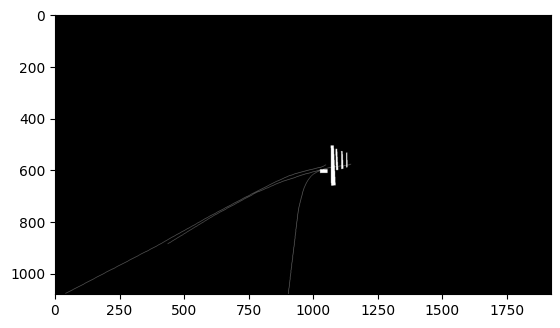

In [321]:
plt.imshow(img_gt)

In [120]:
rail_objectects = set()
for annotation_pth in annotations:
    with open(annotation_pth.as_posix(), "r") as file:
        annotation = json.load(file)
    for objectect in annotation["objectects"]:
        if "rail" in objectect["label"]:
            rail_objectects.add(annotation_pth)

In [323]:
seg_map_pth = "/home/mmhamdi/workspace/unsupervised/Unsupervised-Anomlay-Detection/data/wilddash2/rs19_val/uint8/rs19_val/rs00000.png"

In [324]:
seg_map = cv2.imread(seg_map_pth)

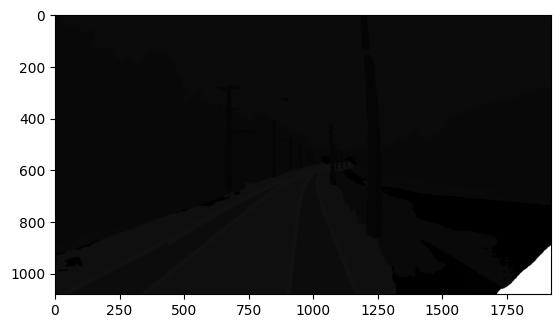

In [325]:
plt.imshow(seg_map)

In [328]:
np.unique(seg_map)

array([  0,   1,   2,   5,   8,   9,  10,  12,  13,  15,  17, 255],
      dtype=uint8)